In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge, Lasso

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')



ModuleNotFoundError: No module named 'lightgbm'

In [39]:
!pip install xgboost

In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"

In [13]:
df=pd.read_csv(file_path)

In [14]:
df.head()

,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6.1,978
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Acer       237 non-null    object 
 1   4          237 non-null    int64  
 2   IPS Panel  237 non-null    object 
 3   2          237 non-null    int64  
 4   1          237 non-null    int64  
 5   5          237 non-null    int64  
 6   35.56      237 non-null    object 
 7   1.6        237 non-null    float64
 8   8          237 non-null    int64  
 9   256        237 non-null    int64  
 10  1.6.1      237 non-null    object 
 11  978        237 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 22.3+ KB


In [19]:
df.shape

(237, 12)

In [20]:
df.isna().sum()

Acer         0
4            0
IPS Panel    0
2            0
1            0
5            0
35.56        0
1.6          0
8            0
256          0
1.6.1        0
978          0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [32]:
df.describe()

,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,3.202532,2.151899,1.059072,5.632911,2.363291,7.881857,245.738397,1464.388186
std,0.776450,0.639556,0.236258,1.243736,0.409271,2.487845,34.832516,574.956374
min,1.000000,1.000000,1.000000,3.000000,1.200000,4.000000,128.000000,527.000000
25%,3.000000,2.000000,1.000000,5.000000,2.000000,8.000000,256.000000,1068.000000
50%,3.000000,2.000000,1.000000,5.000000,2.500000,8.000000,256.000000,1333.000000
75%,4.000000,3.000000,1.000000,7.000000,2.700000,8.000000,256.000000,1777.000000
max,5.000000,3.000000,2.000000,7.000000,2.900000,16.000000,256.000000,3810.000000


In [23]:
headers=["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg","Price"]
df.columns=headers
df.head(10)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016
5,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.1,1117
6,Acer,3,IPS Panel,2,1,5,38.1,1.6,4,256,2.2,866
7,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.3,812
8,Acer,3,IPS Panel,3,1,7,38.1,1.8,8,256,2.2,1068
9,Dell,3,Full HD,1,1,7,39.624,1.8,8,256,2.13,975


In [25]:
df.describe(include='all')

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,237,237.000000,237,237.000000,237.000000,237.000000,237,237.000000,237.000000,237.000000,237,237.000000
unique,11,NaN,2,NaN,NaN,NaN,10,NaN,NaN,NaN,78,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,39.624,NaN,NaN,NaN,2.2,NaN
freq,71,NaN,161,NaN,NaN,NaN,89,NaN,NaN,NaN,21,NaN
mean,NaN,3.202532,NaN,2.151899,1.059072,5.632911,NaN,2.363291,7.881857,245.738397,NaN,1464.388186
std,NaN,0.776450,NaN,0.639556,0.236258,1.243736,NaN,0.409271,2.487845,34.832516,NaN,574.956374
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,NaN,1.200000,4.000000,128.000000,NaN,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.000000,8.000000,256.000000,NaN,1068.000000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.500000,8.000000,256.000000,NaN,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,NaN,2.700000,8.000000,256.000000,NaN,1777.000000


In [27]:
df.nunique()

Manufacturer         11
Category              5
Screen                2
GPU                   3
OS                    2
CPU_core              3
Screen_Size_inch     10
CPU_frequency        11
RAM_GB                5
Storage_GB_SSD        2
Weight_kg            78
Price               192
dtype: int64

In [28]:
df.head(50)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016
5,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.1,1117
6,Acer,3,IPS Panel,2,1,5,38.1,1.6,4,256,2.2,866
7,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.3,812
8,Acer,3,IPS Panel,3,1,7,38.1,1.8,8,256,2.2,1068
9,Dell,3,Full HD,1,1,7,39.624,1.8,8,256,2.13,975


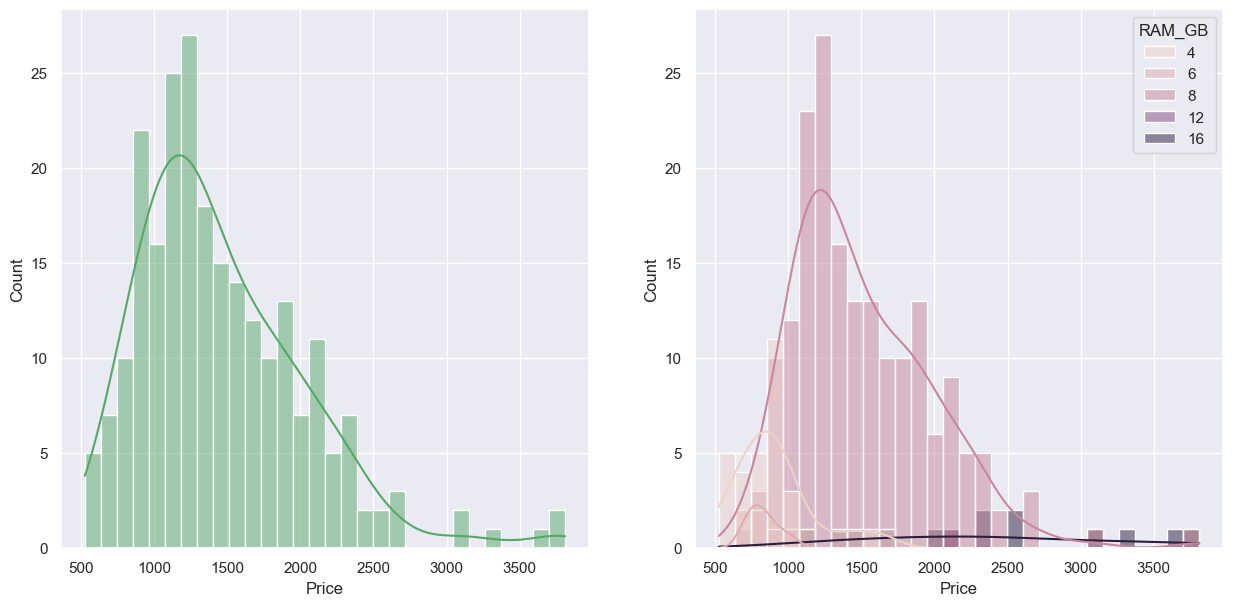

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g', hue= 'RAM_GB')
plt.show()

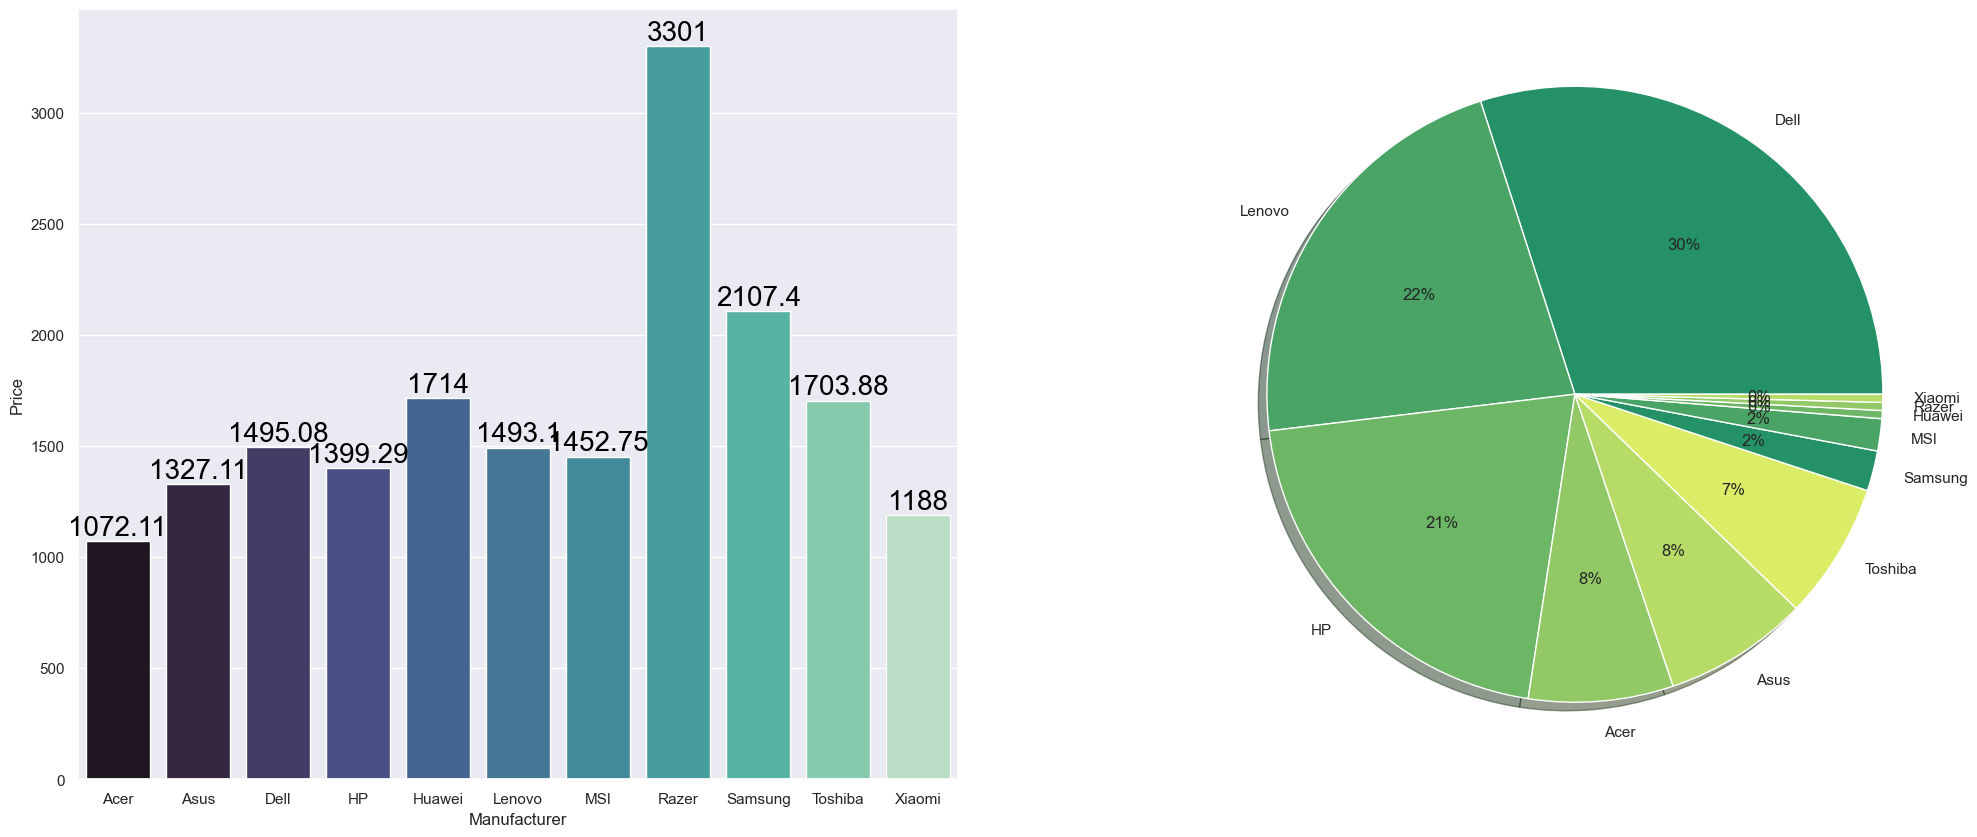

In [42]:
f,ax=plt.subplots(1,2,figsize=(25,10))
Group_data = df.groupby('Manufacturer')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values,ax= ax[0],  palette = 'mako')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    ax[0].set_xlabel("Manufacturer")
    ax[0].set_ylabel("Price")
    
palette_color = sns.color_palette('summer')
plt.pie(x = df['Manufacturer'].value_counts(),labels=df['Manufacturer'].value_counts().index,autopct='%.0f%%',shadow=True, colors= palette_color)
plt.show() 


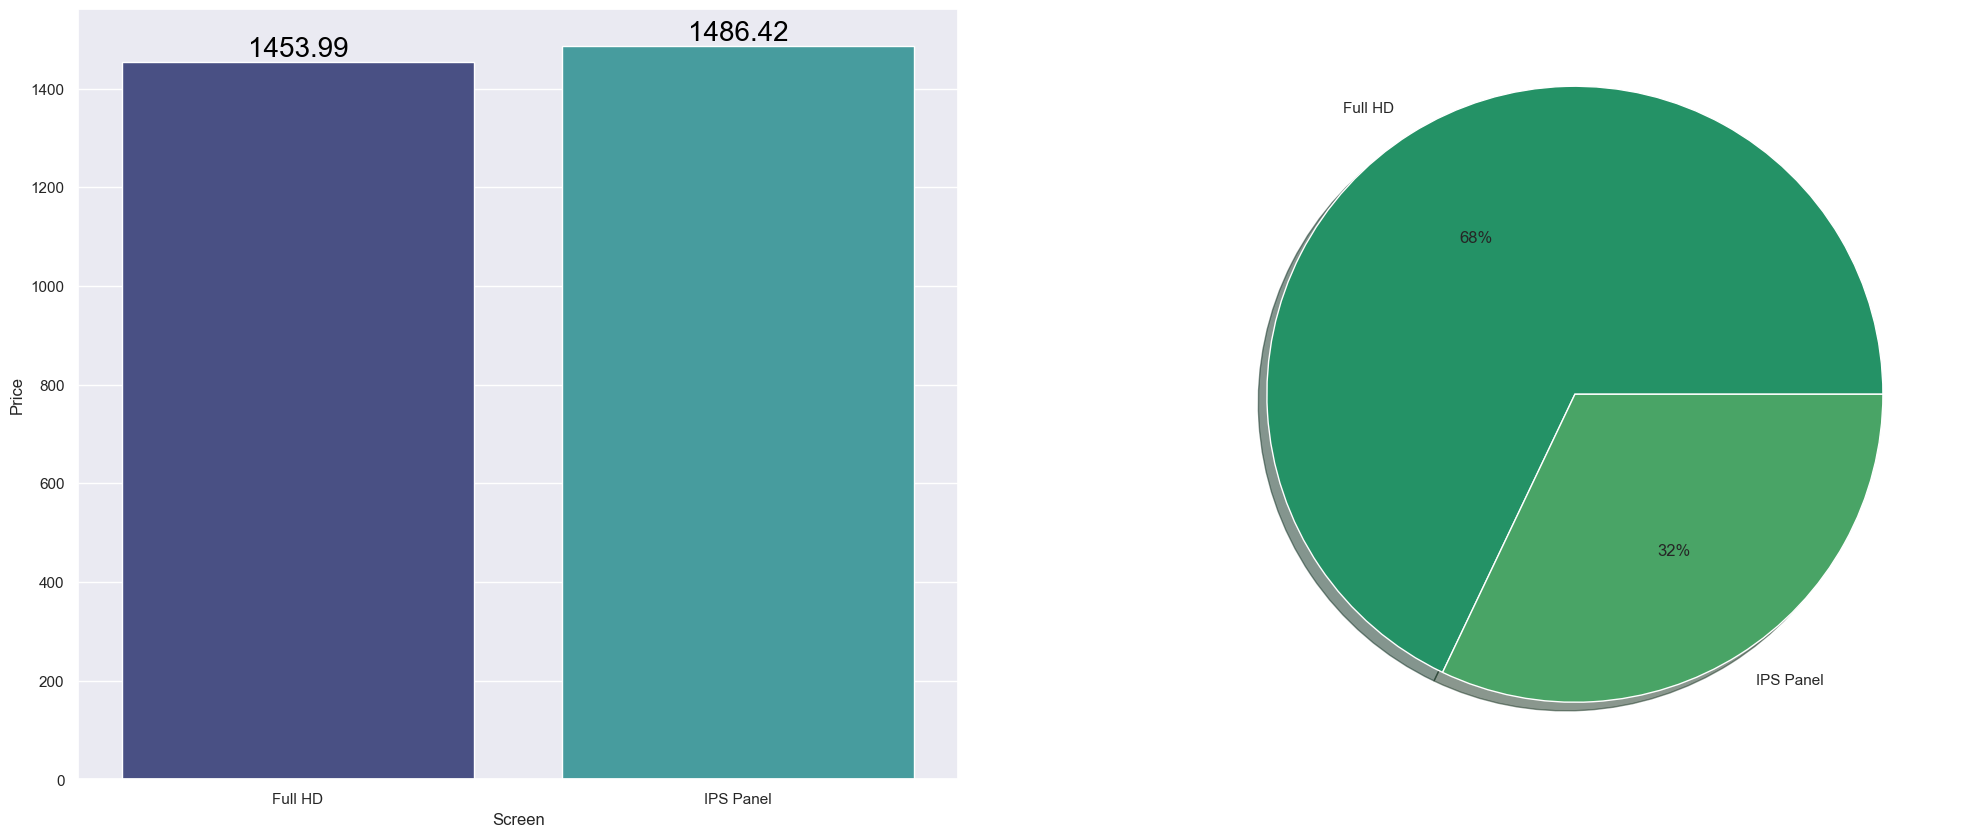

In [44]:
f,ax=plt.subplots(1,2,figsize=(25,10))
Group_data = df.groupby('Screen')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values,ax= ax[0],  palette = 'mako')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    ax[0].set_xlabel("Screen")
    ax[0].set_ylabel("Price")
    
palette_color = sns.color_palette('summer')
plt.pie(x = df['Screen'].value_counts(),labels=df['Screen'].value_counts().index,autopct='%.0f%%',shadow=True, colors= palette_color)
plt.show() 

C:\Users\spraj\AppData\Local\Temp\ipykernel_26840\1801434827.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=df['Screen'],


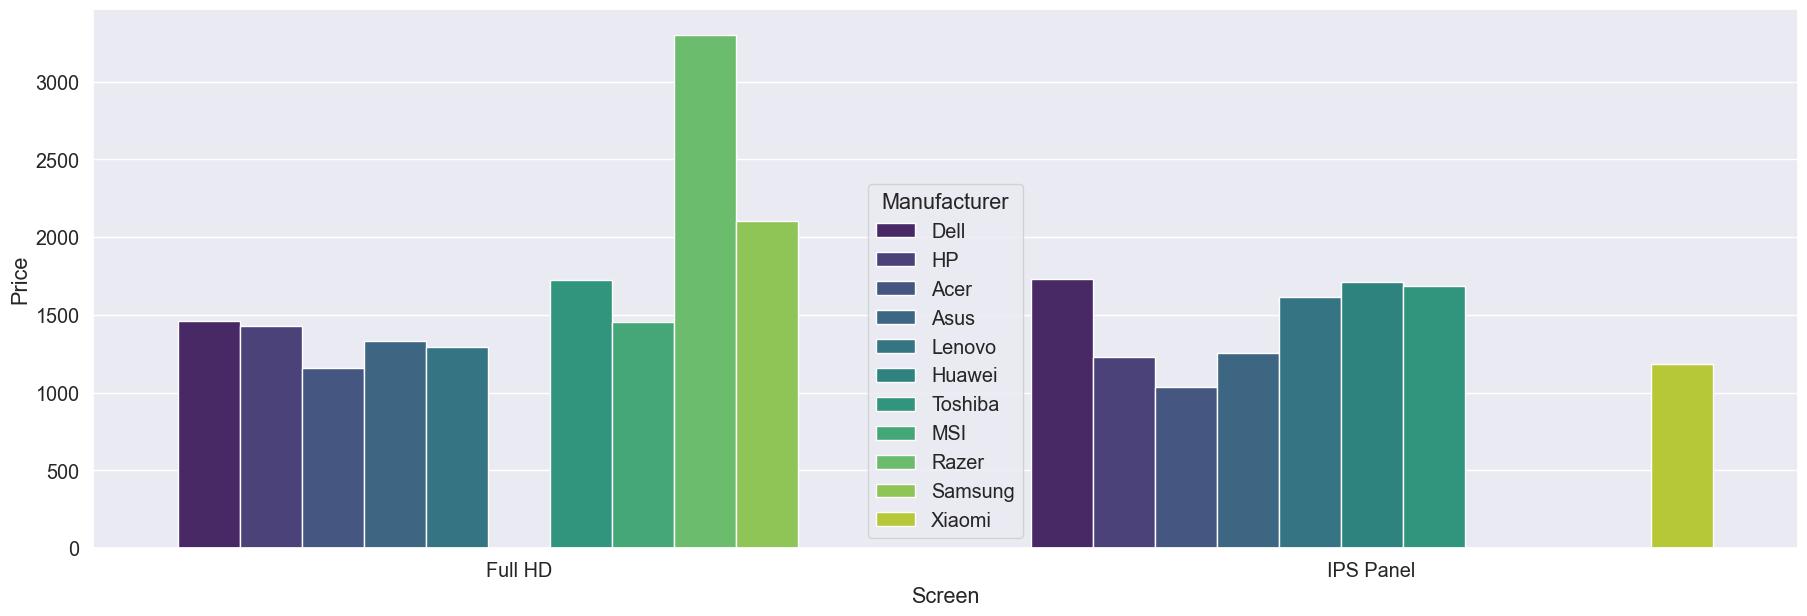

In [45]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=df['Screen'], 
                 y=df['Price'],
                 hue = df['Manufacturer'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Price');